#HW 2

## Name: Tanubrata Dey (td2201)

## Q1.
 The following answers should be presented as a dataframe. The first column should contain distances from the hand written functions, and the second column should contain distances from pre-built functions. 


1.   Write out the function for Manhattan Distance by hand in Python or R. 
2.   Verify the hand written functions from the lab and from Q1.1 by using pre-built functions provided by sklearn, and scipy.stats, or dist(), and cor(). The Isa package in R might also be helpful. 








In [62]:
%%capture
#installing cptac for endometrial data
!pip install cptac

In [ ]:
import pandas as pd

def byhandfunction(x):
  return x

def usefunction(x):
  return x

hand = byhandfunction(2)
func = usefunction(2)
measurement = "test"
df = pd.DataFrame({"by_hand": [hand],
                  "by_func": [func],
                   "distance_measure": [measurement]})
print(df)

   by_hand  by_func distance_measure
0        2        2             test


In [63]:
%%capture
#importing modules
import numpy as np
import pandas as pd
import cptac

#endometrial data downloading, filtering and subsetting

cptac.download(dataset='endometrial', version='2.1.1')
en = cptac.Endometrial()
proteomics = en.get_proteomics()
proteomics_subs = proteomics.iloc[0:15, 0:15]
proteomics_subs = proteomics_subs.dropna()
proteomics_subs

In [64]:
#reshaping and making variable to be used for the functions below
x = proteomics_subs.iloc[0,:].to_numpy().reshape(1,-1)   
y = proteomics_subs.iloc[1,:].to_numpy().reshape(1,-1) 
# binarize the data
x_bin = (x > 0) * 1  
y_bin = (y > 0) * 1

In [65]:
#data necessary for calculating distances
print(x); print(y); print(x_bin); print(y_bin)

[[-1.18   -0.863  -0.802   0.222   0.256   0.665   1.28   -0.339   0.412
  -0.664   0.228  -0.456  -0.256   0.0419  0.857 ]]
[[-0.685  -1.07   -0.684   0.984   0.135   0.334   1.3     0.139   1.33
  -0.367  -0.813   0.012   0.126  -0.263   0.0102]]
[[0 0 0 1 1 1 1 0 1 0 1 0 0 1 1]]
[[0 0 0 1 1 1 1 1 1 0 0 1 1 0 1]]


In [66]:
#using by hand functions to define
def Manhattan_fun(a, b):
  return np.sum((np.abs(a-b)))

def Euclidean_fun(a, b):
  return np.sqrt(np.sum((np.abs(a-b))**2))


def Pearson_fun(a,b):
  n = len(a)

  piece_one = np.sum(a*b)
  piece_two = np.sum(a)*np.sum(b)
  numerator = n*piece_one - piece_two

  piece_three = np.sqrt(n*np.sum(a**2) - np.sum(a)**2)
  piece_four = np.sqrt(n*np.sum(b**2) - np.sum(b)**2)

  denominator = piece_three * piece_four
  
  out = numerator/ denominator
  return out


def Cosine_fun(a,b):
  part_one = np.sum(a*b)
  part_two = np.sqrt(np.sum(a**2))
  part_three = np.sqrt(np.sum(b**2))
  out = 1-(part_one/(part_two*part_three))
  return out


def Jaccard_fun(a,b):
  summ = a + b

  return len(summ[summ == 1]) / (len(summ[summ == 1])+ len(summ[summ == 2]))

In [67]:
#printing all hand_written functions
print("Manhattan distance: ", Manhattan_fun(x,y))
print("Euclidean distance: ", Euclidean_fun(x,y))
print("Pearson correlation: ", Pearson_fun(x[0],y[0]))
print("Cosine distance: ", Cosine_fun(x[0], y[0]))
print("Jaccard distance: ", Jaccard_fun(x_bin,y_bin))

Manhattan distance:  6.7897
Euclidean distance:  2.1035979297384753
Pearson correlation:  0.6963058888834086
Cosine distance:  0.30838185026414244
Jaccard distance:  0.45454545454545453


In [68]:
#defining all inbuilt functions
from scipy.spatial.distance import cityblock, cosine, euclidean, jaccard
from scipy.stats import pearsonr

#using inbuilt functions to define
def manhattan_distance(a, b):
  m_distance = cityblock(a,b)
  return m_distance

def pearson_corr(a, b):
  pearson = pearsonr(a,b )
  return pearson

def cosine_distance(a, b):
  cosine_dist = cosine(a,b)
  return cosine_dist

def euclidean_distance(a, b):
  e_dist = euclidean(a,b)
  return e_dist

def jaccard_distance(a, b):
  jac_distance = jaccard(a,b)
  return jac_distance

In [69]:
#printing all inbuilt function output
print("Manhattan distance: ", manhattan_distance(x,y))
print("Euclidean distance: ", euclidean_distance(x,y))
print("Pearson correlation: ", pearson_corr(x[0],y[0])[0])
print("Cosine distance: ", cosine_distance(x[0], y[0]))
print("Jaccard distance: ", jaccard_distance(x_bin,y_bin))

Manhattan distance:  6.7897
Euclidean distance:  2.1035979297384757
Pearson correlation:  0.696305888883409
Cosine distance:  0.30838185026414255
Jaccard distance:  0.45454545454545453


In [70]:
#variables for each hand_written function
hand_M = Manhattan_fun(x,y)
hand_E = Euclidean_fun(x,y)
hand_P = Pearson_fun(x[0],y[0])
hand_C = Cosine_fun(x[0], y[0])
hand_J = Jaccard_fun(x_bin,y_bin)

#variable for each in_built function
func_M = manhattan_distance(x,y)
func_E = euclidean_distance(x,y)
func_P = pearson_corr(x[0],y[0]) [0]
func_C = cosine_distance(x[0], y[0])
func_J = jaccard_distance(x_bin,y_bin)

#mentioning measurement types for each variable
measurement_M = "Manhattan Distance"
measurement_E = "Euclidean Distance"
measurement_P = "Pearson Correlation"
measurement_C = "Cosine Distance"
measurement_J = "Jaccard Distance"


df = pd.DataFrame({"by_hand": [hand_M, hand_E, hand_P, hand_C, hand_J],
                  "by_func": [func_M, func_E, func_P, func_C, func_J],
                   "distance_measure": [measurement_M, measurement_E, measurement_P, measurement_C, measurement_J]}) #defining df
print(df) #This df contains all the byhand, byfunc and distance measurement types printed below.

    by_hand   by_func     distance_measure
0  6.789700  6.789700   Manhattan Distance
1  2.103598  2.103598   Euclidean Distance
2  0.696306  0.696306  Pearson Correlation
3  0.308382  0.308382      Cosine Distance
4  0.454545  0.454545     Jaccard Distance


# Q2.
 Using the proteomics data from the demos (data with NAs removed), please use hierarchical clustering to cluster patients based on proteomic data.


1. Apply hierarchical clustering to cluster patients using average linkage. The functions from scipy.cluster.hierarchy, or from the stats package in R may be helpful.
2. Plot the resulting dendrogram.  
3. Cut the tree into 3 groups. The functions cutree from the stats pacakge, and cut_tree from scipy.cluster.hierarchy will be helpful. Plot the resulting groups on the dendrogram or print the resulting groupings.



In [71]:
#3.1.
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

Z = shc.linkage(proteomics_subs, "average") #running hierarchy on proteomics_subs with average linkage measure
#pd.DataFrame(Z)
Z

array([[ 2.        ,  4.        ,  1.58203651,  2.        ],
       [ 5.        ,  8.        ,  1.88101779,  2.        ],
       [ 0.        ,  9.        ,  1.97566778,  3.        ],
       [ 1.        , 11.        ,  2.28405316,  4.        ],
       [ 3.        , 12.        ,  2.73202567,  5.        ],
       [ 7.        , 13.        ,  3.29632411,  6.        ],
       [10.        , 14.        ,  3.64349937,  8.        ],
       [ 6.        , 15.        ,  4.19578785,  9.        ]])

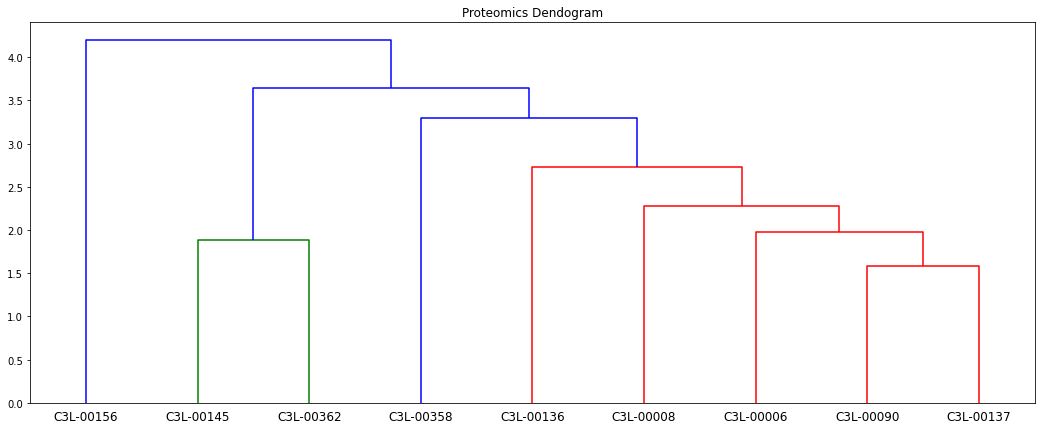

In [72]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 7))
plt.title("Proteomics Dendogram")
dend = shc.dendrogram(shc.linkage(proteomics_subs, method='average'), labels=list(proteomics_subs.index)) #plotting the dendrogram of the proteomics subs with average linkage

In [73]:
dend_cut = shc.cut_tree(Z, n_clusters=3) #cut_tree function to apply n_clusters
dend_cut

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1]])

{'color_list': ['b', 'b'],
 'dcoord': [[0.0, 3.643499365179832, 3.643499365179832, 0.0],
  [0.0, 4.195787852849833, 4.195787852849833, 3.643499365179832]],
 'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'ivl': ['C3L-00156', '(2)', '(6)'],
 'leaves': [6, 10, 14]}

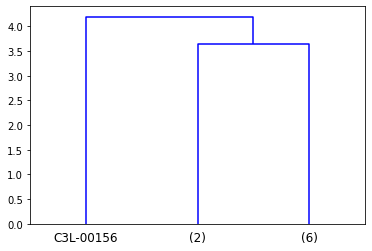

In [82]:
shc.dendrogram(Z, p=3, truncate_mode='lastp', labels=list(proteomics_subs.index)) #cutting the dendogram into 3 clusters

# Q3.
 Using the proteomics data from the demos, please use K-means clustering to cluster patients based on proteomic data. 


1.   Apply K-means clustering to cluster patients. The functions in sklearn.cluster, or the stats package in R may be helpful. 
2.   In bullet points, please list at least one scenario you might use hierarchical clustering over kmeans or kmeans over hierarchical clustering. 



In [ ]:
from sklearn.cluster import KMeans #importing KMeans module

In [ ]:
#list(proteomics_subs.index)
#a = pd.DataFrame(np.transpose(proteomics_subs))
a = pd.DataFrame(proteomics_subs)
a.head()

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2
Patient_ID,,,,,,,,,,,,,,,
C3L-00006,-1.180,-0.863,-0.802,0.2220,0.2560,0.665,1.280,-0.339,0.412,-0.664,0.228,-0.4560,-0.256,0.0419,0.857000
C3L-00008,-0.685,-1.070,-0.684,0.9840,0.1350,0.334,1.300,0.139,1.330,-0.367,-0.813,0.0120,0.126,-0.2630,0.010200
C3L-00090,-1.670,-1.190,-0.443,0.2430,-0.0993,0.757,0.740,-0.929,0.229,-0.223,-0.154,-0.1470,0.287,-0.0767,-0.334000
C3L-00136,-1.080,-0.708,-0.126,-0.4260,-0.1140,-0.111,0.895,1.260,0.157,0.723,-0.350,-0.1020,-0.386,-0.4740,-0.160000
C3L-00137,-1.320,-0.708,-0.808,-0.0709,0.1380,0.656,-0.280,-0.128,0.217,-0.133,-0.192,0.0217,0.298,0.0565,0.000265


In [ ]:
X = np.array(a)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X) #fitting the KMeans in X containing the proteomics_subs data
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
#kmeans.labels_
#pd.DataFrame(kmeans.cluster_centers_, index=[1, 2, 3], columns = proteomics_subs.index)
pd.DataFrame(kmeans.cluster_centers_, index=[1, 2, 3]) #printing the cluster centers of kmeans


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,-1.1195,-0.872667,-0.732167,-0.02965,0.12845,0.284333,0.484167,-0.091167,0.416,-0.1305,-0.235667,-0.206383,0.081,-0.178383,0.207577
2,-0.8200,-0.665000,2.195000,-0.51050,0.16000,0.440500,0.085250,-0.420240,0.264,-0.0255,-0.451000,-0.408500,-0.135,0.027500,-0.378500
3,-0.2320,-0.091000,0.618000,1.63000,-0.25000,1.330000,-1.720000,-0.889000,0.633,-0.3710,-1.780000,-0.105000,0.424,0.010200,0.088000


In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 2, 0, 1], dtype=int32)

In [ ]:
b_predicted = kmeans.fit_predict(a)
a["Cluster"] = b_predicted #adding the cluster column with clusters corresponding to patients

a

Name,A1BG,A2M,A2ML1,A4GALT,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,Cluster
Patient_ID,,,,,,,,,,,,,,,,
C3L-00006,-1.180,-0.863,-0.802,0.2220,0.2560,0.665,1.2800,-0.33900,0.412,-0.664,0.228,-0.4560,-0.256,0.0419,0.857000,0
C3L-00008,-0.685,-1.070,-0.684,0.9840,0.1350,0.334,1.3000,0.13900,1.330,-0.367,-0.813,0.0120,0.126,-0.2630,0.010200,0
C3L-00090,-1.670,-1.190,-0.443,0.2430,-0.0993,0.757,0.7400,-0.92900,0.229,-0.223,-0.154,-0.1470,0.287,-0.0767,-0.334000,0
C3L-00136,-1.080,-0.708,-0.126,-0.4260,-0.1140,-0.111,0.8950,1.26000,0.157,0.723,-0.350,-0.1020,-0.386,-0.4740,-0.160000,0
C3L-00137,-1.320,-0.708,-0.808,-0.0709,0.1380,0.656,-0.2800,-0.12800,0.217,-0.133,-0.192,0.0217,0.298,0.0565,0.000265,0
C3L-00145,-0.716,-0.885,2.820,-0.3430,0.1470,0.445,-0.0565,-0.83800,0.049,0.176,-0.567,-0.1700,-0.163,-0.1290,-0.550000,1
C3L-00156,-0.232,-0.091,0.618,1.6300,-0.2500,1.330,-1.7200,-0.88900,0.633,-0.371,-1.780,-0.1050,0.424,0.0102,0.088000,2
C3L-00358,-0.782,-0.697,-1.530,-1.1300,0.4550,-0.595,-1.0300,-0.55000,0.151,-0.119,-0.133,-0.5670,0.417,-0.3550,0.872000,0
C3L-00362,-0.924,-0.445,1.570,-0.6780,0.1730,0.436,0.2270,-0.00248,0.479,-0.227,-0.335,-0.6470,-0.107,0.1840,-0.207000,1





*   KMeans needs advanced knowledge of the K or number clusters you want your data to be divided whereas Hierarchial Clustering can be used with any number of clusters you feel its okay by seeing the plotted dendrogram. So I will use KMeans only if I know I have a good grasp of the dataset I have or we can do hierarchial clustering to first get the dendrogram and then determine the clusters suitable if I don't have good knowledge of the data I am clustering.





#Q4. 
The MNIST (Mixed National Institute of Standards and Technology) database contains 60000 training examples and 10000 testing examples of handwritten digit images. Due to its popularity in performance testing, it has been recognized as "the Drosophila of machine learning". In this assignment, we ask you to apply some clustering methods to a subset (n=1000) of the MNIST data.

Each sample contains 784 integers ranging from  0  to  255 , representing intensity value of a  28×28  image, one number for one pixel. To conveniently run the clustering functions, the square pixel matrix is flattened into the row vector, from left to right, top to bottom, with the first element of the vector corresponds to the upper left pixel. The label vector is a 1000-element array containing the true class of the samples.

The following problems can be solved in Python or R. The data is also saved in this folder as dat.txt and lab.txt.

In [22]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc

In [2]:
from tensorflow.keras.datasets import mnist
_ , (dat, lab) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(dat.shape)
print(lab.shape)

(10000, 28, 28)
(10000,)


In [4]:
dat = dat[0:1000,:,:].reshape((1000, 28*28))  # flatten the image for the convenient of downstream analysis
lab = lab[0:1000]

In [5]:
print(f'Data dimension: {dat.shape}')
print(f'First 10 labels: {lab[0:10]}')

Data dimension: (1000, 784)
First 10 labels: [7 2 1 0 4 1 4 9 5 9]


In [6]:
type(dat)

numpy.ndarray

In [ ]:
#columns(result_data_df[0])

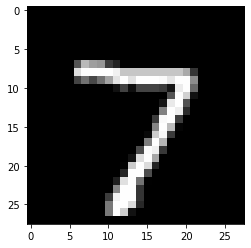

In [7]:
import matplotlib.pyplot as plt
im = dat[0,:]
im = im.reshape((28, 28))
plt.imshow(im, cmap='gray')



1. Subset the data and only keep examples whose true labels are 0 or 1. Run hierarchical clustering on this subset with Euclidean distance as the dissimilarity measure. Plot the dendrogram for single, complete and average linkages.
2. For the three dengrograms obtained in question 1, cut each tree and obtain two-group assignments. Produce contingency tables for each assignment compared to the true labels. Which linkage performs the best? 
3. Run the K-means algorithm with  𝑘=10  to cluster all of the 1000 images into 10 groups. Visualize the cluster centers (centroids) as ten  28×28  images.



**1. Subset the data and only keep examples whose true labels are 0 or 1. Run hierarchical clustering on this subset with Euclidean distance as the dissimilarity measure. Plot the dendrogram for single, complete and average linkages.**

In [11]:
df_data = pd.DataFrame(dat) #creating a df of dat array
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
df_label = pd.DataFrame(lab)
df_label.columns = ["labels"] #creating a df of labels
df_label.head()

,labels
0,7
1,2
2,1
3,0
4,4


In [13]:
result_data_df = pd.concat([df_label, df_data], axis=1, join='inner')
result_data_df #merging the data table and labels table into one


,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_data_filter = result_data_df.loc[(result_data_df['labels'] == 0) | (result_data_df['labels'] == 1)] #filtering out rows that have only 0 & 1 as labels

In [15]:
df_data_filter

,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
988,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
994,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_label_filter = pd.DataFrame(df_data_filter["labels"].copy())
df_label_filter #keeping a copy of the label column

,labels
2,1
3,0
5,1
10,0
13,0
...,...
984,1
988,1
993,0
994,1


In [17]:
df_data_filter = df_data_filter.drop(["labels"], axis=1) #dropping the label column
df_data_filter

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df_data_filter_array = df_data_filter.copy()
df_data_filter_array = df_data_filter_array.to_numpy() #converting the filtered df into an array

In [19]:
df_data_filter_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
df_data_filter_array.shape

(211, 784)

Run hierarchical clustering on this subset with Euclidean distance as the dissimilarity measure. Plot the dendrogram for single, complete and average linkages.

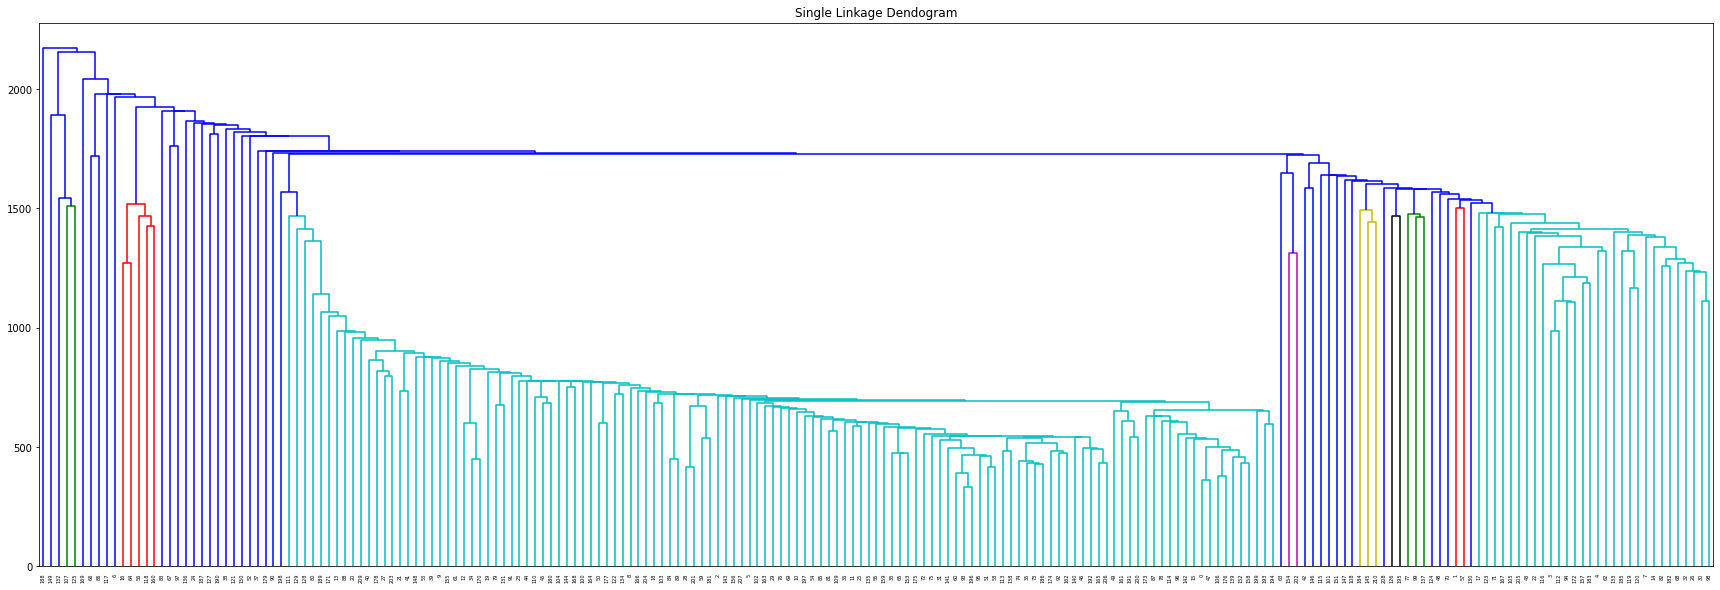

In [23]:
#Dendrogram for Single Linkage
data_single = shc.linkage(df_data_filter_array, method = "single", metric='euclidean') #doing linkage function
#pd.DataFrame(Z)
data_single

plt.figure(figsize=(30, 10))
plt.title("Single Linkage Dendogram")
dend_single = shc.dendrogram(data_single)

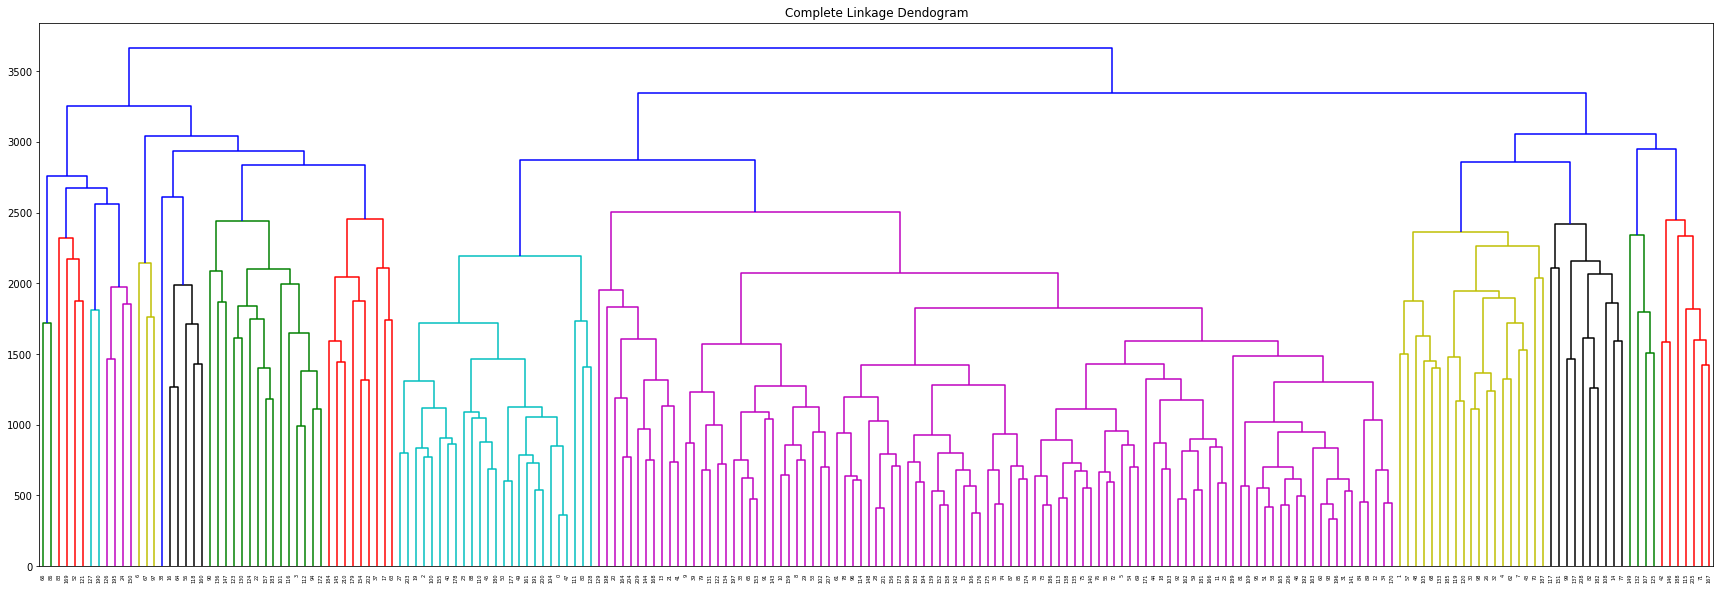

In [24]:
#Dendrogram for Complete Linkage
data_complete = shc.linkage(df_data_filter_array, method = "complete", metric='euclidean')
#pd.DataFrame(Z)
data_complete

plt.figure(figsize=(30, 10))
plt.title("Complete Linkage Dendogram")
dend_complete = shc.dendrogram(data_complete)

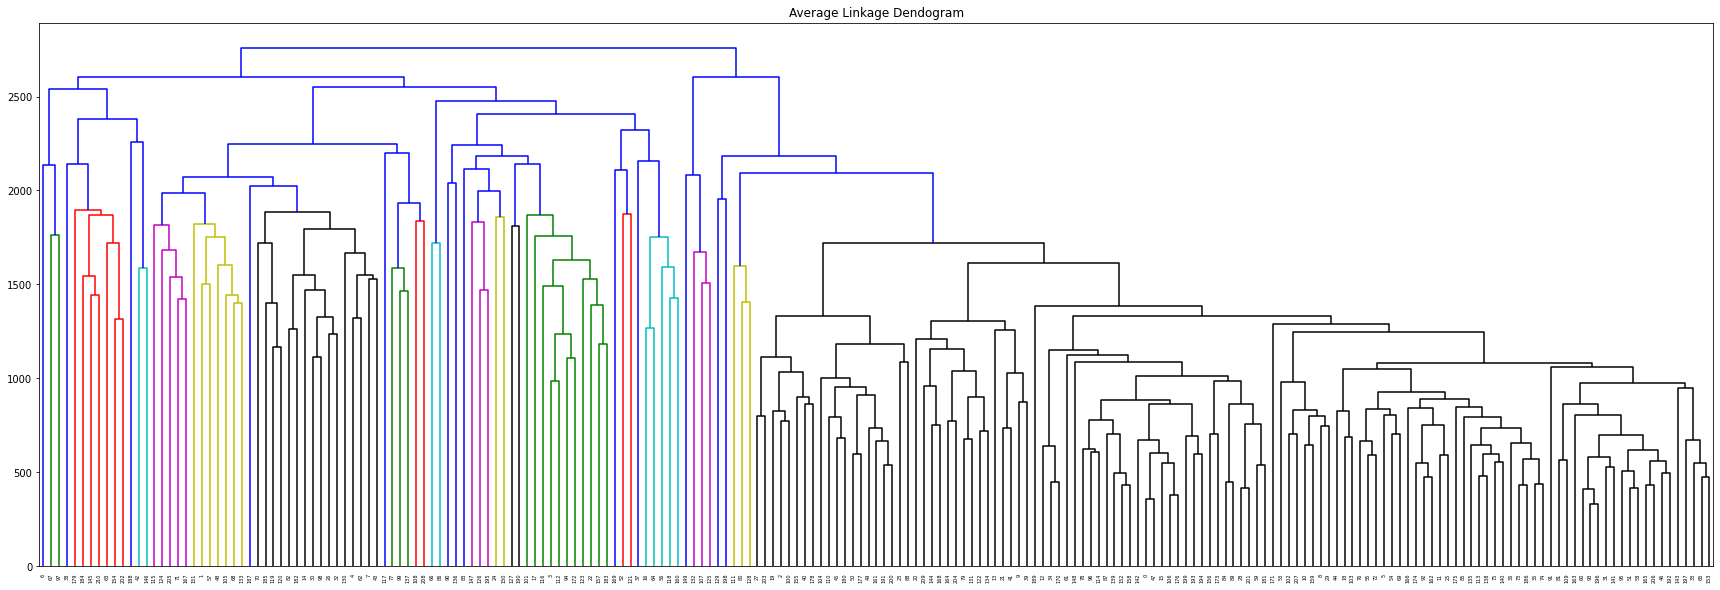

In [25]:
#Dendrogram for Average Linkage
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

data_average = shc.linkage(df_data_filter_array, method = "average", metric='euclidean')
#pd.DataFrame(Z)
data_average

plt.figure(figsize=(30, 10))
plt.title("Average Linkage Dendogram")
dend_average = shc.dendrogram(data_average)

**2. For the three dengrograms obtained in question 1, cut each tree and obtain two-group assignments. Produce contingency tables for each assignment compared to the true labels. Which linkage performs the best?**

In [ ]:
df_label_filter_array = df_label_filter.copy() 
df_label_filter_array = df_label_filter_array.to_numpy()


In [29]:
df_label_filter_array.shape 

(211, 1)

In [83]:
import scipy.cluster.hierarchy as shc #hierarchial cluster module load
import matplotlib.pyplot as plt #matplotlib module load

In [86]:
dend_single_cut = shc.cut_tree(data_single, n_clusters=2) #cutting the single linkage dendrogram
dend_single_cut.shape #dendogram cut for single

(211, 1)

In [88]:
dend_complete_cut = shc.cut_tree(data_complete, n_clusters=2) #cutting the complete linkage dendrogram
dend_complete_cut.shape #dendogram cut for complete

(211, 1)

In [90]:
dend_average_cut = shc.cut_tree(data_average, n_clusters=2) #cutting the average linkage dendrogram
dend_average_cut.shape #dendogram cut for average

(211, 1)

In [215]:
test = pd.DataFrame(dend_single_cut) #converting the cut_tree Single linkage array into a df
test1 = pd.DataFrame(dend_complete_cut) #converting the cut_tree Complete linkage array into a df
test2 = pd.DataFrame(dend_average_cut) #converting the cut_tree Average linkage array into a df

In [216]:
test.columns = ["Single"]
test1.columns = ["Complete"]
test2.columns = ["Average"]

In [220]:
test = test.applymap(str) #converting whole df from int to str for all of them
test1 = test1.applymap(str)
test2 = test2.applymap(str)


In [193]:
test.dtypes

0    object
dtype: object

In [107]:
test_lab = pd.DataFrame(df_label_filter_array) #copying the filtered labels into a new df

In [217]:
test_lab.columns = ["true_label"]
test_lab

,true_label
0,1
1,0
2,1
3,0
4,0
...,...
206,1
207,1
208,0
209,1


In [221]:
#test_lab = test_lab.applymap(str) #converting the whole df into str
test_lab["true_label"]
test["Single"]

0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    0
208    0
209    0
210    0
Name: Single, Length: 211, dtype: object

In [222]:
crosstab1 = pd.crosstab(index = test_lab["true_label"], columns=test["Single"])
crosstab1.columns = ["clusterA", "clusterB"]
crosstab1 #dendrogram cut crosstab for single linkage data

,clusterA,clusterB
true_label,,
0,84,1
1,126,0


In [223]:
crosstab2 = pd.crosstab(index = test_lab["true_label"], columns=test1["Complete"])
crosstab2.columns = ["clusterA", "clusterB"]
crosstab2 #dendrogram cut crosstab for complete linkage data

,clusterA,clusterB
true_label,,
0,40,45
1,126,0


In [173]:
test1[0].value_counts()

0    166
1     45
Name: 0, dtype: int64

In [225]:
crosstab3 = pd.crosstab(index = test_lab["true_label"], columns=test2["Average"])
crosstab3.columns = ["clusterA", "clusterB"]
crosstab3 #dendrogram cut crosstab for average linkage data

,clusterA,clusterB
true_label,,
0,4,81
1,126,0


I feel the one with "Single Linkage" is better because it has higher true positives compared to other 2 contingency tables.

**3. Run the K-means algorithm with 𝑘=10 to cluster all of the 1000 images into 10 groups. Visualize the cluster centers (centroids) as ten 28×28 images.**

In [32]:
from sklearn.cluster import KMeans #import KMeans from Sklearn

In [33]:
image_data = dat.copy() #copying dat into a new df
dat_kmeans = KMeans(n_clusters=10, random_state=0).fit(image_data) #running KMeans on the whole dat data
dat_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [36]:
dat_kmeans.cluster_centers_.shape #checking shape of the cluster

(10, 784)

In [47]:
len(dat_kmeans.cluster_centers_)

10

Now plotting each 28x28 image for each cluster separately

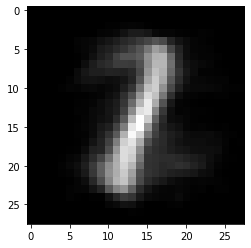

In [51]:
import matplotlib.pyplot as plt

im1 = dat_kmeans.cluster_centers_[0,:]
im1 = im1.reshape((28, 28))
plt.imshow(im1, cmap='gray')

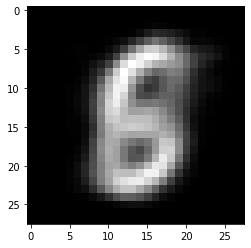

In [52]:
im2 = dat_kmeans.cluster_centers_[1,:]
im2 = im2.reshape((28, 28))
plt.imshow(im2, cmap='gray')

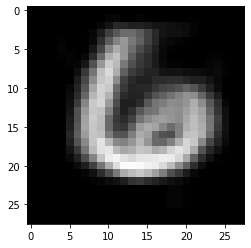

In [53]:
im3 = dat_kmeans.cluster_centers_[2,:]
im3 = im3.reshape((28, 28))
plt.imshow(im3, cmap='gray')

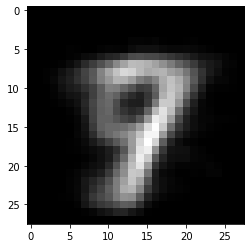

In [54]:
im4 = dat_kmeans.cluster_centers_[3,:]
im4 = im4.reshape((28, 28))
plt.imshow(im4, cmap='gray')

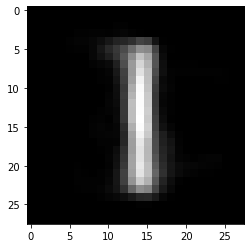

In [55]:
im5 = dat_kmeans.cluster_centers_[4,:]
im5 = im5.reshape((28, 28))
plt.imshow(im5, cmap='gray')

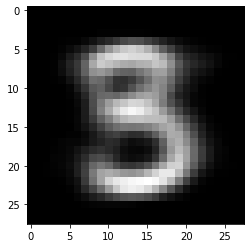

In [56]:
im6 = dat_kmeans.cluster_centers_[5,:]
im6 = im6.reshape((28, 28))
plt.imshow(im6, cmap='gray')

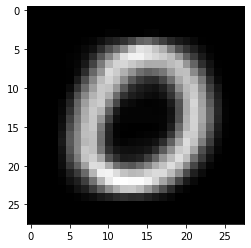

In [57]:
im7 = dat_kmeans.cluster_centers_[6,:]
im7 = im7.reshape((28, 28))
plt.imshow(im7, cmap='gray')

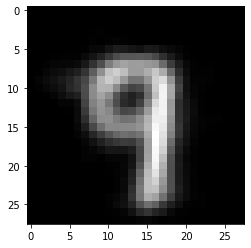

In [58]:
im8 = dat_kmeans.cluster_centers_[7,:]
im8 = im8.reshape((28, 28))
plt.imshow(im8, cmap='gray')

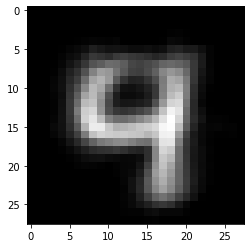

In [59]:
im9 = dat_kmeans.cluster_centers_[8,:]
im9 = im9.reshape((28, 28))
plt.imshow(im9, cmap='gray')

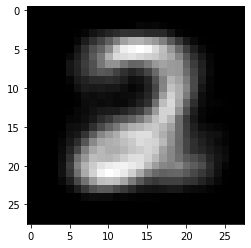

In [60]:
im10 = dat_kmeans.cluster_centers_[9,:]
im10 = im10.reshape((28, 28))
plt.imshow(im10, cmap='gray')